In [1]:
rf = True
xt = False
gb = False
neural_net = False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

# from sklearn.utils.multiclass import unique_labels
if (rf): from sklearn.ensemble import RandomForestClassifier
elif (xt): from sklearn.ensemble import ExtraTreesClassifier
elif (gb): from sklearn.ensemble import GradientBoostingClassifier
elif (neural_net): 
    from torch import nn
    from torch.optim import Adam
    from torch.utils.data import DataLoader

# from sklearn.neural_network import MLPClassifier

import joblib

import torch
import time
import random

In [3]:
%run '00_tools.ipynb'

In [4]:
train_np = np.load(f'{train_vect_path}updated_train_df.npy')

In [5]:
X = train_np[:, 2:]
Y = train_np[:, 0]

X = np.array(X)
Y = np.array(Y).astype(float)

In [6]:
torchX = torch.tensor(X, dtype=torch.float32)
torchY = torch.tensor(Y, dtype=torch.float32)

x_train, x_test, y_train, y_test = train_test_split(torchX, torchY, test_size=0.2, random_state=12345)

### Random Forest Classifier

In [7]:
load = True
save = False

In [8]:
if (rf):
    if (not load):

        start_time = time.time()

        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=12345)
        rf_classifier.fit(x_train, y_train)

        end_time = time.time()
        t = end_time - start_time

        print(f'RF Overall Accuracy is {str(rf_classifier.score(x_test, y_test)*100)[:5]}% | Train Time {str(t)[:6]}')

        if (save): joblib.dump(rf_classifier, f'{saved_model_path}rf_sentiment.joblib')

    else:

        rf_classifier = joblib.load(f'{saved_model_path}rf_sentiment.joblib')
        print(f'Overall Accuracy is {str(rf_classifier.score(x_test, y_test)*100)[:5]}%')

Overall Accuracy is 98.43%


[[2951   13   41]
 [   0 2489    6]
 [  21   63 3588]]


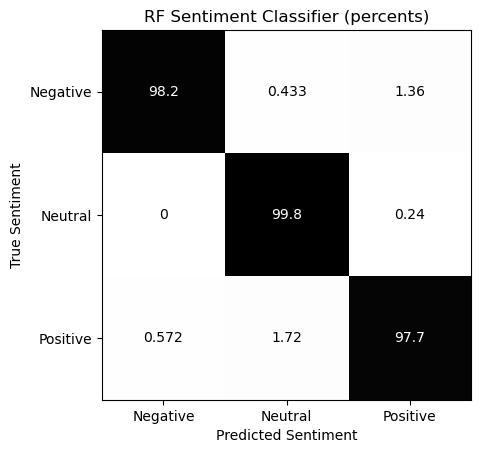

In [9]:
if (rf):

    test_preds = rf_classifier.predict(x_test).round()

    confusion_matrix = metrics.confusion_matrix(y_test.detach().numpy(), test_preds)

    print(confusion_matrix)

    cm_percent = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis] * 100

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_percent)

    cm_display.plot(cmap=plt.cm.Greys, values_format=".3g", colorbar=False)

    labels = ['Negative', 'Neutral', 'Positive']
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    
    plt.xlabel('Predicted Sentiment')
    plt.ylabel('True Sentiment')
    
    plt.title('RF Sentiment Classifier (percents)')
    plt.show()

### Extra Trees Classifier

In [10]:
if (xt):
    start = time.time()
                                        # parameters
    xt_classifier = ExtraTreesClassifier(n_estimators=50, max_depth=20, random_state=12345)
    xt_classifier.fit(x_train, y_train)
    end = time.time()

    traintime = (str(end - start)[:5])
    score = xt_classifier.score(x_test, y_test)

    print(f'Overall Accuracy is {score}% | Train Time {traintime}.')

In [11]:
if (xt):
    test_preds = xt_classifier.predict(x_test).round()

    confusion_matrix = metrics.confusion_matrix(y_test.detach().numpy(), test_preds)

    cm_percent = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis] * 100

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_percent)

    cm_display.plot()

    plt.title('XT Classifier Confusion Matrix')
    plt.show()

### Gradient Boosting

In [13]:
if (gb):
    start = time.time()
    gb_clf = GradientBoostingClassifier(n_estimators=50, max_depth=8, random_state=12345)
    gb_clf.fit(x_train, y_train)
    end = time.time()
    print(f'Overall Accuracy {gb_clf.score(x_test, y_test)}% | Train Time {end - start}.')